In [1]:
import csv
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from pylab import *
import fits
roi_df = pd.read_csv("C:/Users/chris/Desktop/projects/optometry/jupyter/opt.csv")

getBimodalExpected was called.
Expected values: 
(287.982865, 20, 1600.0, 3597.947805, 30, 227.0)
Least Squares Sum: 29688.228209034045
             params      sigma
mu1      315.492983   1.172215
sigma1    52.202482   1.298449
A1      1823.897681  37.350458
mu2     3893.828414  33.890067
sigma2  1489.606011  34.422399
A2       212.877325   4.198295


array([ 315.4929834 ,   52.20248187, 1823.89768051, 3893.82841372,
       1489.60601133,  212.87732515])

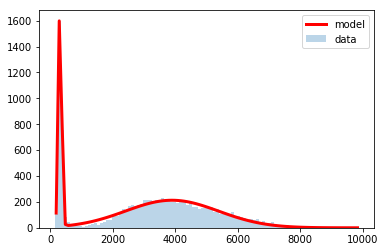

In [2]:
p = fits.bimodalGraph("DAPI", roi_df)
p

In [24]:
def determineThresholds(col, table, cutoff=0.01): #change bins?
    '''Determines the thresholds for the column of the table with the given cutoff.
    Returns the left x and right x that at the cutoff value. For example, with a cutoff of
    0.01, this fn will return the left x and right x that keeps 1% of the mass on the left
    and 1% of the mass on the right, respectively.'''
    assert(cutoff > 0 and cutoff < 1)
    nparr = np.asarray(table[col].tolist())
    y,x,_=hist(nparr,1000,alpha=.3,label='data')
    x=(x[1:]+x[:-1])/2
    sum = 0
    for ycord in y:
        sum += ycord
    left = sum * cutoff
    right = sum * (1 - cutoff)
    sum = 0
    leftx = 0
    rightx = 0
    for xcord, ycord in zip(x,y):
        sum += ycord
        if (left < sum and leftx == 0):
            leftx = xcord
        if (right < sum and rightx == 0):
            rightx = xcord
            break
    return leftx, rightx

(234.43931450000002, 7584.5085195)

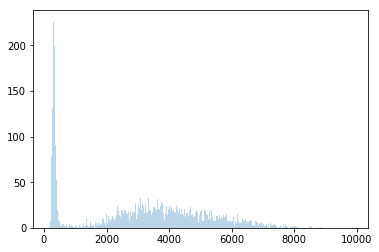

In [25]:
determineThresholds("DAPI", roi_df)

In [23]:
def normalize(col, table, cutoff=0.01):
    '''Determines thresholds using the determineThresholds fn. For all numbers
    greater than 1, they are made 1. For all numbers less than 0, they are made 0.
    A new col named normalized + colname is created in the table.'''
    leftx, rightx = determineThresholds(col, table, cutoff=0.01)
    def new(signal):
        normsignal = (signal - leftx) / (rightx - leftx)
        if (normsignal > 1):
            return 1
        elif (normsignal < 0):
            return 0
        else:
            return normsignal
    
    table['normalized ' + col] = table[col].apply(new)

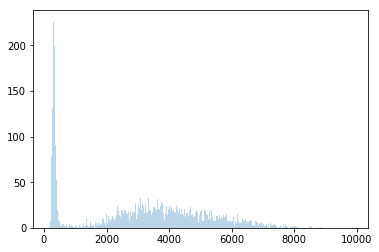

In [6]:
normalize("DAPI", roi_df)

In [7]:
nparra = np.asarray(roi_df["normalized DAPI"].tolist())

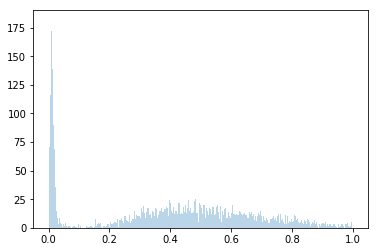

In [8]:
x,y,z = hist(nparra,1000,alpha=.3,label='data')

In [9]:
z

<a list of 1000 Patch objects>

In [10]:
nparrb = np.asarray(roi_df["DAPI"].tolist())

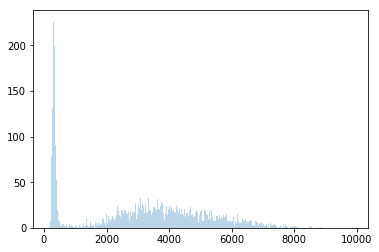

In [11]:
x1,y1,z1 = hist(nparrb,1000,alpha=.3,label='data')

In [12]:
roi_df

,Unnamed: 0,ind cell,total index,TARPg3,Islet1,Pax6,DAPI,CD15,GLT-1,Cav3.1,...,Kv2.2,DAPI.2,CAVIII,Rec,DAPI.3,Calb,PKC,Parv,DAPI.4,normalized DAPI
0,21_s1m1,21_s1m1_cell 0,cell 0,1049.972,1219.007,449.386,369.136,1240.079,981.801,958.693,...,2556.831,417.485,2203.484,13829.995,360.501,1027.346,918.365,578.774,392.588,0.018326
1,NaN,21_s1m1_cell 1,cell 1,395.788,1588.703,401.111,988.403,1032.487,689.971,897.504,...,2347.903,1335.316,2049.701,3100.799,551.900,639.677,961.900,549.374,2217.022,0.102579
2,NaN,21_s1m1_cell 2,cell 2,453.132,1118.557,389.423,2316.406,1024.207,721.093,1008.160,...,2509.955,2136.745,2155.466,2365.397,578.747,651.101,750.467,368.244,3577.374,0.283258
3,NaN,21_s1m1_cell 3,cell 3,565.603,1665.260,1170.452,4304.305,1162.536,831.560,1058.113,...,2432.743,3310.959,1805.437,1456.221,795.310,671.911,724.990,251.416,6386.156,0.553718
4,NaN,21_s1m1_cell 4,cell 4,474.185,1715.672,1364.448,1284.858,1074.590,735.607,919.485,...,2517.504,1794.311,1777.483,1389.022,492.442,620.084,747.552,279.824,2357.532,0.142913
5,NaN,21_s1m1_cell 5,cell 5,489.498,1895.483,526.208,3884.522,1131.230,836.739,1014.064,...,2445.114,2483.683,2254.428,3052.163,653.723,679.968,805.010,264.807,5140.438,0.496605
6,NaN,21_s1m1_cell 6,cell 6,555.135,1069.362,420.988,2019.306,1087.467,721.672,876.248,...,2415.474,2016.282,2163.559,2509.543,568.636,678.397,962.450,542.144,3144.598,0.242837
7,NaN,21_s1m1_cell 7,cell 7,412.604,2604.476,542.122,3174.623,1047.102,744.626,903.238,...,2334.345,2329.341,2232.583,3664.120,634.762,845.913,1080.113,530.172,4615.724,0.400021
8,NaN,21_s1m1_cell 8,cell 8,674.315,1547.361,572.972,1768.599,1160.208,793.278,1037.414,...,2370.343,1646.042,2305.185,2980.294,584.965,798.611,1618.762,1375.329,2534.641,0.208727
9,NaN,21_s1m1_cell 9,cell 9,503.689,2437.244,904.448,2906.748,1054.896,714.839,896.123,...,2342.032,2285.144,2127.150,2378.254,662.628,1215.031,1216.468,922.402,4417.063,0.363576


In [18]:
rm_roi_df = roi_df[roi_df['normalized DAPI'] > 0.2]
rm_roi_df

,Unnamed: 0,ind cell,total index,TARPg3,Islet1,Pax6,DAPI,CD15,GLT-1,Cav3.1,...,Kv2.2,DAPI.2,CAVIII,Rec,DAPI.3,Calb,PKC,Parv,DAPI.4,normalized DAPI
2,NaN,21_s1m1_cell 2,cell 2,453.132,1118.557,389.423,2316.406,1024.207,721.093,1008.160,...,2509.955,2136.745,2155.466,2365.397,578.747,651.101,750.467,368.244,3577.374,0.283258
3,NaN,21_s1m1_cell 3,cell 3,565.603,1665.260,1170.452,4304.305,1162.536,831.560,1058.113,...,2432.743,3310.959,1805.437,1456.221,795.310,671.911,724.990,251.416,6386.156,0.553718
5,NaN,21_s1m1_cell 5,cell 5,489.498,1895.483,526.208,3884.522,1131.230,836.739,1014.064,...,2445.114,2483.683,2254.428,3052.163,653.723,679.968,805.010,264.807,5140.438,0.496605
6,NaN,21_s1m1_cell 6,cell 6,555.135,1069.362,420.988,2019.306,1087.467,721.672,876.248,...,2415.474,2016.282,2163.559,2509.543,568.636,678.397,962.450,542.144,3144.598,0.242837
7,NaN,21_s1m1_cell 7,cell 7,412.604,2604.476,542.122,3174.623,1047.102,744.626,903.238,...,2334.345,2329.341,2232.583,3664.120,634.762,845.913,1080.113,530.172,4615.724,0.400021
8,NaN,21_s1m1_cell 8,cell 8,674.315,1547.361,572.972,1768.599,1160.208,793.278,1037.414,...,2370.343,1646.042,2305.185,2980.294,584.965,798.611,1618.762,1375.329,2534.641,0.208727
9,NaN,21_s1m1_cell 9,cell 9,503.689,2437.244,904.448,2906.748,1054.896,714.839,896.123,...,2342.032,2285.144,2127.150,2378.254,662.628,1215.031,1216.468,922.402,4417.063,0.363576
11,NaN,21_s1m1_cell 11,cell 11,455.525,2302.930,2254.279,3280.239,1088.712,739.788,942.314,...,2461.318,2852.631,1743.278,1357.719,788.239,643.616,642.672,254.190,4540.725,0.414391
14,NaN,21_s1m1_cell 14,cell 14,632.461,2545.598,1781.568,5091.065,1154.271,834.190,1000.138,...,2417.630,2858.768,1984.977,1874.134,800.961,674.594,739.816,259.155,5181.804,0.660759
15,NaN,21_s1m1_cell 15,cell 15,426.542,2807.967,677.442,2957.409,1051.836,735.408,959.597,...,2359.182,2207.716,2845.533,1832.874,721.905,667.530,982.118,255.851,4393.780,0.370469


Unnamed: 0
ind cell
total index


C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


normalized DAPI


,Unnamed: 0,ind cell,total index,TARPg3,Islet1,Pax6,DAPI,CD15,GLT-1,Cav3.1,...,normalized SCGN,normalized Kv2.2,normalized DAPI.2,normalized CAVIII,normalized Rec,normalized DAPI.3,normalized Calb,normalized PKC,normalized Parv,normalized DAPI.4
2,NaN,21_s1m1_cell 2,cell 2,453.132,1118.557,389.423,2316.406,1024.207,721.093,1008.160,...,0.316144,0.472079,0.169057,0.220058,0.332291,0.000000,0.000000,0.007463,0.014112,0.351869
3,NaN,21_s1m1_cell 3,cell 3,565.603,1665.260,1170.452,4304.305,1162.536,831.560,1058.113,...,0.020134,0.397662,0.332758,0.130357,0.104712,0.036096,0.007439,0.003529,0.000000,0.788997
5,NaN,21_s1m1_cell 5,cell 5,489.498,1895.483,526.208,3884.522,1131.230,836.739,1014.064,...,0.065533,0.409585,0.217424,0.245419,0.504197,0.007127,0.010478,0.015886,0.000199,0.595127
6,NaN,21_s1m1_cell 6,cell 6,555.135,1069.362,420.988,2019.306,1087.467,721.672,876.248,...,0.100124,0.381018,0.152263,0.222132,0.368373,0.000000,0.009886,0.040197,0.037502,0.284516
7,NaN,21_s1m1_cell 7,cell 7,412.604,2604.476,542.122,3174.623,1047.102,744.626,903.238,...,0.027948,0.302825,0.195907,0.239821,0.657378,0.003247,0.073082,0.058366,0.035891,0.513466
8,NaN,21_s1m1_cell 8,cell 8,674.315,1547.361,572.972,1768.599,1160.208,793.278,1037.414,...,0.033562,0.337521,0.100646,0.258427,0.486208,0.000000,0.055237,0.141541,0.149566,0.189589
9,NaN,21_s1m1_cell 9,cell 9,503.689,2437.244,904.448,2906.748,1054.896,714.839,896.123,...,0.016519,0.310234,0.189746,0.212802,0.335509,0.008949,0.212334,0.079421,0.088647,0.482549
11,NaN,21_s1m1_cell 11,cell 11,455.525,2302.930,2254.279,3280.239,1088.712,739.788,942.314,...,0.012430,0.425203,0.268861,0.114428,0.080056,0.034650,0.000000,0.000000,0.000000,0.501794
14,NaN,21_s1m1_cell 14,cell 14,632.461,2545.598,1781.568,5091.065,1154.271,834.190,1000.138,...,0.020940,0.383096,0.269716,0.176368,0.209321,0.037253,0.008451,0.005819,0.000000,0.601565
15,NaN,21_s1m1_cell 15,cell 15,426.542,2807.967,677.442,2957.409,1051.836,735.408,959.597,...,0.032389,0.326763,0.178951,0.396901,0.198994,0.021077,0.005786,0.043234,0.000000,0.478925


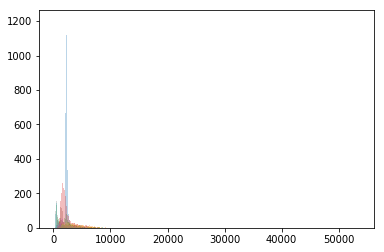

In [77]:
for col in list(rm_roi_df):
    if col.startswith("normalized") or (rm_roi_df[col]).isna().any() or type(list(rm_roi_df[col])[0]) != float:
        print(col)
        continue
    normalize(col, rm_roi_df)
rm_roi_df

In [38]:
type(roi_df["Unnamed: 0"][0]) == np.float64

False

In [53]:
(rm_roi_df["Unnamed: 0"]).isna().any()

True

In [71]:
type(list(rm_roi_df["ind cell"])[0])

str

In [74]:
(rm_roi_df["Pax6"]).isna().any()

False

In [76]:
type(list(rm_roi_df["Pax6"])[0])

float

In [78]:
rm_roi_df

,Unnamed: 0,ind cell,total index,TARPg3,Islet1,Pax6,DAPI,CD15,GLT-1,Cav3.1,...,normalized SCGN,normalized Kv2.2,normalized DAPI.2,normalized CAVIII,normalized Rec,normalized DAPI.3,normalized Calb,normalized PKC,normalized Parv,normalized DAPI.4
2,NaN,21_s1m1_cell 2,cell 2,453.132,1118.557,389.423,2316.406,1024.207,721.093,1008.160,...,0.316144,0.472079,0.169057,0.220058,0.332291,0.000000,0.000000,0.007463,0.014112,0.351869
3,NaN,21_s1m1_cell 3,cell 3,565.603,1665.260,1170.452,4304.305,1162.536,831.560,1058.113,...,0.020134,0.397662,0.332758,0.130357,0.104712,0.036096,0.007439,0.003529,0.000000,0.788997
5,NaN,21_s1m1_cell 5,cell 5,489.498,1895.483,526.208,3884.522,1131.230,836.739,1014.064,...,0.065533,0.409585,0.217424,0.245419,0.504197,0.007127,0.010478,0.015886,0.000199,0.595127
6,NaN,21_s1m1_cell 6,cell 6,555.135,1069.362,420.988,2019.306,1087.467,721.672,876.248,...,0.100124,0.381018,0.152263,0.222132,0.368373,0.000000,0.009886,0.040197,0.037502,0.284516
7,NaN,21_s1m1_cell 7,cell 7,412.604,2604.476,542.122,3174.623,1047.102,744.626,903.238,...,0.027948,0.302825,0.195907,0.239821,0.657378,0.003247,0.073082,0.058366,0.035891,0.513466
8,NaN,21_s1m1_cell 8,cell 8,674.315,1547.361,572.972,1768.599,1160.208,793.278,1037.414,...,0.033562,0.337521,0.100646,0.258427,0.486208,0.000000,0.055237,0.141541,0.149566,0.189589
9,NaN,21_s1m1_cell 9,cell 9,503.689,2437.244,904.448,2906.748,1054.896,714.839,896.123,...,0.016519,0.310234,0.189746,0.212802,0.335509,0.008949,0.212334,0.079421,0.088647,0.482549
11,NaN,21_s1m1_cell 11,cell 11,455.525,2302.930,2254.279,3280.239,1088.712,739.788,942.314,...,0.012430,0.425203,0.268861,0.114428,0.080056,0.034650,0.000000,0.000000,0.000000,0.501794
14,NaN,21_s1m1_cell 14,cell 14,632.461,2545.598,1781.568,5091.065,1154.271,834.190,1000.138,...,0.020940,0.383096,0.269716,0.176368,0.209321,0.037253,0.008451,0.005819,0.000000,0.601565
15,NaN,21_s1m1_cell 15,cell 15,426.542,2807.967,677.442,2957.409,1051.836,735.408,959.597,...,0.032389,0.326763,0.178951,0.396901,0.198994,0.021077,0.005786,0.043234,0.000000,0.478925


In [81]:
rm_roi_df.to_csv(r'C:\Users\chris\Desktop\projects\optometry\jupyter\normalized.csv')